<a href="https://colab.research.google.com/github/helmahdy/Advanced-Machine-Learning/blob/main/Helmahdy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the data

In [ ]:
import keras
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# Building the network

##Original Model:
Two hidden layers, each has 16 hidden units

In [ ]:
from keras import models
from keras import layers

Original_model = models.Sequential()
Original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Original_model.add(layers.Dense(16, activation='relu'))
Original_model.add(layers.Dense(1, activation='sigmoid'))

Original_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Increasing Hidden layers:
Here we have 3 hidden layers, each with 16 hiddent units:
 improve model performance on validation dataset


In [ ]:
Bigger_model = models.Sequential()
Bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Bigger_model.add(layers.Dense(16, activation='relu'))
Bigger_model.add(layers.Dense(16, activation='relu'))
Bigger_model.add(layers.Dense(1, activation='sigmoid'))


Bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Splitting dataset into validation and training

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs , in mini-batches of 512 
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the 
validation data as the `validation_data` argument:

In [ ]:
Original_history = Original_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 5.1703e-04 - accuracy: 0.9999 - val_loss: 1.3946 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 1.0292e-05 - accuracy: 1.0000 - val_loss: 1.3945 - val_accuracy: 0.8596
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 7.5636e-06 - accuracy: 1.0000 - val_loss: 1.4035 - val_accuracy: 0.8599
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 6.3246e-06 - accuracy: 1.0000 - val_loss: 1.4193 - val_accuracy: 0.8592
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 5.0660e-06 - accuracy: 1.0000 - val_loss: 1.4574 - val_accuracy: 0.8594
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 3.7808e-04 - accuracy: 0.9998 - val_loss: 1.5370 - val_accuracy: 0.8573
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 5.9224e-06 - accuracy: 1.0000 - val_loss: 1.5223 - val_ac

In [ ]:
Bigger_history= Bigger_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 8.5526e-06 - accuracy: 1.0000 - val_loss: 1.6666 - val_accuracy: 0.8499
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 1.5809 - val_accuracy: 0.8579
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 6.3519e-06 - accuracy: 1.0000 - val_loss: 1.5877 - val_accuracy: 0.8578
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 5.4386e-06 - accuracy: 1.0000 - val_loss: 1.5956 - val_accuracy: 0.8572
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 4.6619e-06 - accuracy: 1.0000 - val_loss: 1.6090 - val_accuracy: 0.8579
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 3.7521e-06 - accuracy: 1.0000 - val_loss: 1.6472 - val_accuracy: 0.8581
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 2.4092e-06 - accuracy: 1.0000 - val_loss: 1.7377 - val_accura

In [ ]:
Bigger_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 77ms/step - loss: 0.6190 - accuracy: 0.9423
Epoch 2/4
49/49 [==============================] - 4s 79ms/step - loss: 0.2444 - accuracy: 0.9555
Epoch 3/4
49/49 [==============================] - 3s 65ms/step - loss: 0.1402 - accuracy: 0.9643
Epoch 4/4
782/782 [==============================] - 11s 13ms/step - loss: 1.6732 - accuracy: 0.8801


Results summary: Increasing hidden layers hasn't changed accuracy on training data and slightly decreased accuracy on validation from %85.91 to %85795. We will keep experimenting with parameters to get better results 

In [ ]:
# `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
#about everything that happened during training.

history_dict1 = Original_history.history
history_dict1.keys()

history_dict2 = Bigger_history.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's use Matplotlib to plot validation loss for the original model and bigger model

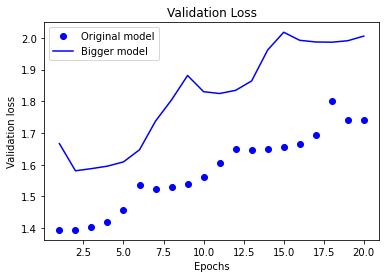

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_val_loss = Original_history.history['val_loss']
bigger_model_val_loss = Bigger_history.history['val_loss']


# bo is for "blue dot"
plt.plot(epochs, original_val_loss, 'bo', label='Original model')
# "b" is for "blue line"
plt.plot(epochs, bigger_model_val_loss, 'b', label='Bigger model')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


We can see here how the validation loss using bigger model was small after 5 epochs compared to the orignal model with 2 hidden layers

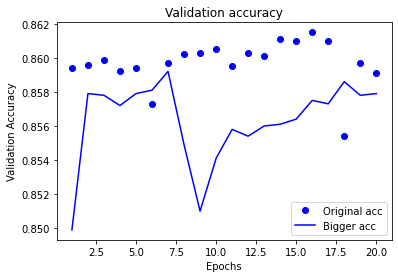

In [ ]:
plt.clf()   # clear figure
Original_accuracy = Original_history.history['val_accuracy']
Bigger_accuracy = Bigger_history.history['val_accuracy']

plt.plot(epochs, Original_accuracy, 'bo', label='Original acc')
plt.plot(epochs, Bigger_accuracy, 'b', label='Bigger acc')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

Let's evaluate it on our test data:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.5550 - accuracy: 0.7272
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2637 - accuracy: 0.9099
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1963 - accuracy: 0.9301
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1599 - accuracy: 0.9432
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1429 - accuracy: 0.9501
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1179 - accuracy: 0.9597
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1064 - accuracy: 0.9642
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0833 - accuracy: 0.9741
Epoch 9/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0703 - accuracy: 0.9778
Epoch 10/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0617 - accuracy: 0.9809
Epoch 11/

In [ ]:
results

[0.9298104643821716, 0.8514000177383423]

On Unseen data, the 3 hidden layer model achieved an accuracy of 85%. 

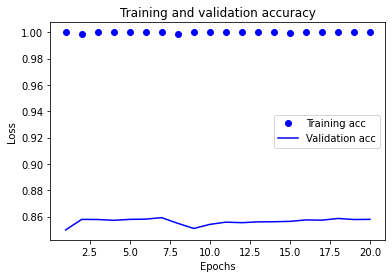

In [ ]:
import matplotlib.pyplot as plt

acc = Bigger_history.history['accuracy']
val_acc = Bigger_history.history['val_accuracy']
loss = Bigger_history.history['loss']
val_loss = Bigger_history.history['val_loss']


acc_values = history_dict2['accuracy']
val_acc_values = history_dict2['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As we can see training and validation accuracy hasn't increased nor decreased on our bigger model with one more layer. Next we will try adding more hidden units.

##Adding more hiddin units to the hidden layers: 

For this section we see how increaing the hidden units in each layer had improved model accuracy to 100% on training data, 88.96% on validation data, and 88% on test data as the results show below:


In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 10s 329ms/step - loss: 0.7047 - accuracy: 0.6279 - val_loss: 0.3866 - val_accuracy: 0.8268
Epoch 2/20
30/30 [==============================] - 9s 313ms/step - loss: 0.2926 - accuracy: 0.8792 - val_loss: 0.3793 - val_accuracy: 0.8470
Epoch 3/20
30/30 [==============================] - 9s 313ms/step - loss: 0.1613 - accuracy: 0.9365 - val_loss: 0.3760 - val_accuracy: 0.8529
Epoch 4/20
30/30 [==============================] - 13s 455ms/step - loss: 0.0688 - accuracy: 0.9782 - val_loss: 0.4291 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 9s 314ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.4890 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 9s 313ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.6422 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 9s 313ms/step - loss: 6.2134e-05 - accuracy: 1.0000 - val_loss: 0.7783 - val_accuracy: 0.8894


In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 13s 260ms/step - loss: 0.6353 - accuracy: 0.9370
Epoch 2/4
49/49 [==============================] - 12s 250ms/step - loss: 0.0847 - accuracy: 0.9735
Epoch 3/4
49/49 [==============================] - 12s 252ms/step - loss: 0.0684 - accuracy: 0.9851
Epoch 4/4
782/782 [==============================] - 10s 13ms/step - loss: 0.7731 - accuracy: 0.8809


Let's look at the loss and accuracy on both our training and validation datasets

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

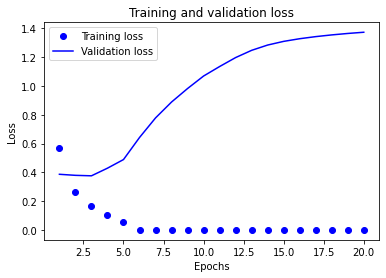

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

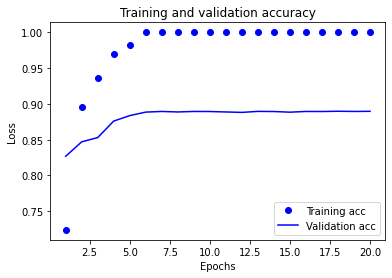

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Looking at the results above, it seems like our model is overfitting which means that it is not generalizing better on validation data

# Using MSE as a loss function:

Since mse is better used for regression problems, using Mse as a loss function instead of binary_crossentropy in this classification problem has decreased accuracy for both training and validation data as the results show below:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_u = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.2086 - accuracy: 0.7014 - val_loss: 0.1239 - val_accuracy: 0.8646
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0986 - accuracy: 0.9036 - val_loss: 0.0949 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0682 - accuracy: 0.9332 - val_loss: 0.0881 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0514 - accuracy: 0.9500 - val_loss: 0.0834 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0396 - accuracy: 0.9611 - val_loss: 0.0889 - val_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0324 - accuracy: 0.9706 - val_loss: 0.0872 - val_accuracy: 0.8789
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0260 - accuracy: 0.9778 - val_loss: 0.0852 - val_accuracy: 0.8840
Epoch 8/20
30

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0442 - accuracy: 0.9466
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0320 - accuracy: 0.9628
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0255 - accuracy: 0.9722
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.8624


# Using 'tanh' as activation function instead of 'relu'

Using 'tanh' instead of 'relu' as an activation function for the same model has dropped accuracy on validation and test dataset but seemed to increase accuracy on training dataset.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_u = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5704 - accuracy: 0.7049 - val_loss: 0.3608 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2947 - accuracy: 0.9033 - val_loss: 0.2861 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1948 - accuracy: 0.9360 - val_loss: 0.2882 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1438 - accuracy: 0.9533 - val_loss: 0.2833 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1060 - accuracy: 0.9664 - val_loss: 0.3111 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0821 - accuracy: 0.9745 - val_loss: 0.3742 - val_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0632 - accuracy: 0.9822 - val_loss: 0.3942 - val_accuracy: 0.8770
Epoch 8/20
30

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0448 - accuracy: 0.9466
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0331 - accuracy: 0.9629
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0270 - accuracy: 0.9704
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1167 - accuracy: 0.8590


# DROPOUT as a reguliarization method to prevent overfitting

To improve model performance on validation dataset, a number of output features of the layer will be randomly dropped out. we will use a dropout rate of 0.5 on the model we have build earlier:

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(512, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 22s 445ms/step - loss: 0.5984 - acc: 0.7014 - val_loss: 0.3171 - val_acc: 0.8670
Epoch 2/20
49/49 [==============================] - 17s 344ms/step - loss: 0.2527 - acc: 0.8999 - val_loss: 0.3622 - val_acc: 0.8518
Epoch 3/20
49/49 [==============================] - 17s 347ms/step - loss: 0.1836 - acc: 0.9284 - val_loss: 0.3284 - val_acc: 0.8735
Epoch 4/20
49/49 [==============================] - 17s 341ms/step - loss: 0.1183 - acc: 0.9573 - val_loss: 0.5213 - val_acc: 0.8156
Epoch 5/20
49/49 [==============================] - 17s 343ms/step - loss: 0.0770 - acc: 0.9739 - val_loss: 0.4193 - val_acc: 0.8826
Epoch 6/20
49/49 [==============================] - 17s 342ms/step - loss: 0.0554 - acc: 0.9855 - val_loss: 0.5348 - val_acc: 0.8826
Epoch 7/20
49/49 [==============================] - 17s 342ms/step - loss: 0.0383 - acc: 0.9890 - val_loss: 0.6404 - val_acc: 0.8799
Epoch 8/20
49/49 [==============================] - 17s 343ms/step - 

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 13s 257ms/step - loss: 3.0963e-09 - accuracy: 1.0000
Epoch 2/4
49/49 [==============================] - 13s 257ms/step - loss: 2.2012e-09 - accuracy: 1.0000
Epoch 3/4
49/49 [==============================] - 13s 258ms/step - loss: 1.7245e-09 - accuracy: 1.0000
Epoch 4/4
782/782 [==============================] - 10s 13ms/step - loss: 1.7704 - accuracy: 0.8798


**Let's plot the results**:


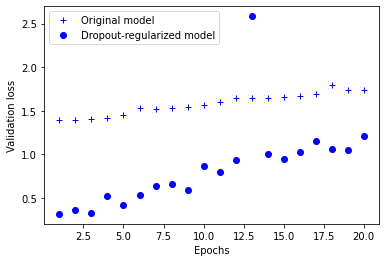

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


In this graph, we can see the different validation loss on both the original model and the regularized model

Here we tried increasing the hidden layers and use same dropout rate and same units number and we can see how the model did better

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(512, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(512, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 25s 492ms/step - loss: 0.6301 - acc: 0.6721 - val_loss: 0.3542 - val_acc: 0.8468
Epoch 2/20
49/49 [==============================] - 22s 455ms/step - loss: 0.2828 - acc: 0.8869 - val_loss: 0.3394 - val_acc: 0.8483
Epoch 3/20
49/49 [==============================] - 18s 363ms/step - loss: 0.1883 - acc: 0.9296 - val_loss: 0.3048 - val_acc: 0.8849
Epoch 4/20
49/49 [==============================] - 18s 363ms/step - loss: 0.1246 - acc: 0.9553 - val_loss: 0.3696 - val_acc: 0.8710
Epoch 5/20
49/49 [==============================] - 18s 363ms/step - loss: 0.0724 - acc: 0.9754 - val_loss: 0.4503 - val_acc: 0.8852
Epoch 6/20
49/49 [==============================] - 18s 362ms/step - loss: 0.0617 - acc: 0.9850 - val_loss: 0.5522 - val_acc: 0.8832
Epoch 7/20
49/49 [==============================] - 18s 361ms/step - loss: 0.0178 - acc: 0.9954 - val_loss: 0.9848 - val_acc: 0.8622
Epoch 8/20
49/49 [==============================] - 18s 362ms/step - 

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 12s 252ms/step - loss: 0.0974 - accuracy: 0.9886
Epoch 2/4
49/49 [==============================] - 12s 252ms/step - loss: 6.2378e-04 - accuracy: 0.9999
Epoch 3/4
49/49 [==============================] - 12s 252ms/step - loss: 2.0691e-05 - accuracy: 1.0000
Epoch 4/4
782/782 [==============================] - 10s 13ms/step - loss: 1.3304 - accuracy: 0.8792


# Summary of the results:

When the model is doing well on training but not well on validation, the model might be overfitting. There are some ways that can be implemented to prevent overfitting. Dropout is one of the common methods.
In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, and the loss function you should use is binary_crossentropy.
The rmsprop optimizer is generally a good enough choice of optimizer, whatever your problem.



> In the table below, we can see how the models with more hidden layers, more hidden units and the model the implemented Dropout have generalized better on both training and test data.




In [125]:
from google.colab import drive
drive.mount('/content/drive')

pd.read_excel('/content/drive/My Drive/results.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hyperparameters,Loss,Accuracy,Validation loss,Validation Accuracy,Test Accuracy
0,Original Model (2 layers),6.567300e-07,1.0000,1.7403,0.8591,0.8514
1,3 Layers Model,2.637600e-07,1.0000,2.0057,0.8579,0.8801
2,More hidden Units Model (512 units),2.126400e-09,1.0000,1.3738,0.8896,0.8809
3,MSE loss function,3.600000e-03,0.9967,0.1098,0.8653,0.8624
4,tanh activation function,4.086200e-04,1.0000,0.8730,0.8589,0.8590
5,Dropout (2 layers-rate 0.5),3.940000e-02,0.9956,1.2060,0.8683,0.8798
6,Dropout (3 layers-rate 0.5),5.900000e-03,0.9990,1.1816,0.8734,0.8792
